# CONTENT LIST

1. Import Libraries
2. Importing final merged data
3. Security Implications
4. Customer behavior in different geographic areas
5. Excluding low-activity customers
6. Creating 'Parent_Status' Column based on Age and Number of dependent
7. Creating Income profile
8. Create Alcohol Drinking Profile
9. Create breakfast profile
10. Visualization of Profiles distribution
11. Aggregate the max, mean, and min variables on a customer-profile level
12. Compare your customer profiles with regions and departments


# 01. Import Libraries

In [93]:
# Importing all libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing final merged data

In [2]:
# Creating common folder path
path = r'C:\Users\Mukund\Desktop\Career Foundry\Instacart_Grocery_Basket_Analysis_May_2021'

In [3]:
path

'C:\\Users\\Mukund\\Desktop\\Career Foundry\\Instacart_Grocery_Basket_Analysis_May_2021'

In [4]:
# Importing final data using OS library
df_final_data = pd.read_pickle(os.path.join(path, 'Data', 'Prepared_data', 'Final_data_Task9_Part1.pkl'))

In [5]:
# Checking the size of data
df_final_data.shape

(32404859, 33)

In [6]:
# Checking first rows of data
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,First_Name,Surname,Gender,STATE,Age,date_joined,No_of_dependants,Family_status,Annual_income,_merge
0,1,Chocolate Sandwich Cookies,61,19,7,1107,7,0,38259,2,...,nan,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,both
1,769,Sliced American Cheese,21,16,7,1107,10,0,38259,2,...,nan,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,both
2,5258,Sparkling Water,115,7,7,3369664,9,0,38259,3,...,nan,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,both
3,6184,Clementines,32,4,7,1107,14,1,38259,2,...,nan,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,both
4,6184,Clementines,32,4,7,2899757,6,0,38259,1,...,nan,Bean,Female,District of Columbia,68,6/30/2019,2,married,142744,both


# 03. Security Implications

In [7]:
# Checking the column names for PII
df_final_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'price_range_loc', 'Busiest_Day', 'Busiest_Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'Spending',
       'Spending_Flag', 'Frequency', 'Order_Frequency_Flag', 'First_Name',
       'Surname', 'Gender', 'STATE', 'Age', 'date_joined', 'No_of_dependants',
       'Family_status', 'Annual_income', '_merge'],
      dtype='object')

I think, columns with Customer's First_name and Surname contain personally identifiable information. If these columns are not necessary for analysis, they can be removed after discussing with client or seniors.

# 04. Customer behavior in different geographic areas 

In [8]:
# Getting the state names from data
df_final_data['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
# Assigning new variable Region based on states
result = []

for value in df_final_data["STATE"]:
  if (value in( 'Maine','New Hampshire', 'Vermont', 'Rhode Island','Massachusetts','Connecticut','Pennsylvania','New Jersey','New York' )):
    result.append("Northeast")
  elif (value in('Michigan','Illinois','Indiana','Wisconsin','Ohio','North Dakota','South Dakota','Kansas','Nebraska','Iowa','Minnesota','Missouri')):
    result.append("Midwest")
  elif (value in('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana')):
    result.append("South")
  elif (value in('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii')):
    result.append("West")
  else:
    result.append("Not Enough Data")

In [10]:
# Creating 'Region' column in df_final_data using result data
df_final_data['Region'] = result

In [11]:
# Checking the count for this new column
df_final_data['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [12]:
# To check the difference in spending habits between the different U.S. regions, 
# we can create crosstab between Region and Spending_Flag
crosstab = pd.crosstab(df_final_data['Region'], df_final_data['Spending_Flag'], dropna = False)

In [13]:
# Checking the result from crosstab
crosstab

Spending_Flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108200,5614536
South,209610,10582275
West,160328,8132585


Customers from the South region has the largest percentage of both high & low spenders followed by the West, Midwest & then finally the Northeast. Based on the above spenders distribution per region, we can also check the number of orders per region and regional prices with statistics

In [14]:
# Checking the regional prices
df_final_data.groupby(['Region']).agg({'prices':['sum']})

,prices
,sum
Region,
Midwest,92809735
Northeast,63280592
South,126253978
West,89744757


South region has the highest sum of prices paid followed by the Midwest, West and Northeast.

In [15]:
# Checking the regional number of orders
df_final_data.groupby(['Region']).agg({'order_number':['sum']})

,order_number
,sum
Region,
Midwest,128585728.0
Northeast,98521079.0
South,185091277.0
West,143295881.0


Again, South region has the largest number of total orders as compared to other regions

# Summary: The regions have different spending habits in terms of prices and number of orders.

# 05. Excluding  low-activity customers

In [16]:
# Checking the size of data before creating subset
df_final_data.shape

(32404859, 34)

In [17]:
# Creating new column Activity_Flag for low_activity_customers

df_final_data.loc[df_final_data['order_number'] < 5,'Activity_Flag'] = 'Low_Activity_Customer'

In [18]:

df_final_data.loc[df_final_data['order_number'] >= 5,'Activity_Flag'] = 'High_Activity_Customer'

In [19]:
# Checking count of new 'Activity_Flag' column

df_final_data['Activity_Flag'].value_counts(dropna=False)

High_Activity_Customer    24414877
Low_Activity_Customer      7989982
Name: Activity_Flag, dtype: int64

In [20]:
# Creating subset for low activity customers
df_low_activity = df_final_data[df_final_data.Activity_Flag == 'Low_Activity_Customer']

In [21]:
# Checking the size of subset created
df_low_activity.shape

(7989982, 35)

In [22]:
#Export df_low_activity data to pkl
df_low_activity.to_pickle(os.path.join(path,'Data','Prepared_data', 'df_low_activity_task_10.pkl'))

In [23]:
# Updating current data with high activity customers to exclude low activity customers

df_final_data = df_final_data[df_final_data.Activity_Flag == 'High_Activity_Customer']

In [24]:
# Checking the size of data after excluding low activity customers
df_final_data.shape

(24414877, 35)

In [25]:
# Checking the lengths of both data sets to confirm the original data set length 
len(df_final_data) + len (df_low_activity)

32404859

# 06. Creating 'Parent_Status' Column based on Age and Number of dependent

In [26]:
# Condition for no dependents
df_final_data.loc[(df_final_data ['No_of_dependants'] == 0), 'Parent_Status'] = 'No Dependants/Not Parents'

In [27]:
# Condition for young parents
df_final_data.loc[((df_final_data['Age'] >= 18) & (df_final_data['Age'] < 35) & (df_final_data['No_of_dependants'] >= 1)), 'Parent_Status'] = 'Young Parents'

In [28]:
# Condition for Middle-Age parents
df_final_data.loc[((df_final_data['Age'] >= 35) & (df_final_data['Age'] < 60) & (df_final_data['No_of_dependants'] >= 1)), 'Parent_Status'] = 'Mid-Age Parents'

In [29]:
# Condition for Old-Age parents
df_final_data.loc[((df_final_data['Age'] >= 60) & (df_final_data['No_of_dependants'] >= 1)), 'Parent_Status'] = 'Old-Age Parents'

In [30]:
# Checking the count of Parent_Status column
df_final_data['Parent_Status'].value_counts(dropna = False)

Mid-Age Parents              7190133
Old-Age Parents              6241386
No Dependants/Not Parents    6105002
Young Parents                4878356
Name: Parent_Status, dtype: int64

In [31]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,STATE,Age,date_joined,No_of_dependants,Family_status,Annual_income,_merge,Region,Activity_Flag,Parent_Status
60,1,Chocolate Sandwich Cookies,61,19,5,5319,3,1,196224,65,...,New York,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents
61,1,Chocolate Sandwich Cookies,61,19,5,54412,5,1,196224,23,...,New York,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents
62,1,Chocolate Sandwich Cookies,61,19,5,238541,1,1,196224,73,...,New York,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents
63,1,Chocolate Sandwich Cookies,61,19,5,238782,1,1,196224,6,...,New York,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents
64,1,Chocolate Sandwich Cookies,61,19,5,268206,6,1,196224,48,...,New York,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents


# 07. Creating Income profile

In [32]:
# Checking the statistics for income
df_final_data['Annual_income'].describe()

count    2.441488e+07
mean     9.989505e+04
std      4.333357e+04
min      2.590300e+04
25%      6.752400e+04
50%      9.683600e+04
75%      1.281600e+05
max      5.939010e+05
Name: Annual_income, dtype: float64

In [33]:
# Creating Income_Level column for low level income profiles
df_final_data.loc[(df_final_data['Annual_income'] < 43000), 'Income Level'] = 'Lower Income'

In [34]:
# Creating Income_Level column for Middle level income profiles
df_final_data.loc[(df_final_data['Annual_income'] >= 43000) & (df_final_data['Annual_income'] < 128000), 'Income Level'] = 'Middle Income'

In [35]:
# Creating Income_Level column for High level income profiles
df_final_data.loc[(df_final_data['Annual_income'] >= 128000), 'Income Level'] = 'Higher Income'

In [36]:
# Checking the count of Income Level column
df_final_data['Income Level'].value_counts(dropna = False)

Middle Income    16672461
Higher Income     6124002
Lower Income      1618414
Name: Income Level, dtype: int64

In [37]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,Age,date_joined,No_of_dependants,Family_status,Annual_income,_merge,Region,Activity_Flag,Parent_Status,Income Level
60,1,Chocolate Sandwich Cookies,61,19,5,5319,3,1,196224,65,...,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income
61,1,Chocolate Sandwich Cookies,61,19,5,54412,5,1,196224,23,...,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income
62,1,Chocolate Sandwich Cookies,61,19,5,238541,1,1,196224,73,...,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income
63,1,Chocolate Sandwich Cookies,61,19,5,238782,1,1,196224,6,...,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income
64,1,Chocolate Sandwich Cookies,61,19,5,268206,6,1,196224,48,...,48,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income


# 08. Create Alcohol Drinking Profile

In [38]:
# First create alcohol order flag column with department_id 5 
df_final_data.loc[(df_final_data['department_id'] == 5), 'Alcohol Order'] = 1

In [39]:
# Condition for no alcohol order
df_final_data.loc[(df_final_data['department_id'] != 5), 'Alcohol Order'] = 0

In [42]:
# Count of Alcohol Order flag
df_final_data['Alcohol Order'].value_counts(dropna = False)

0    24306905
1      107972
Name: Alcohol Order, dtype: int64

In [43]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,date_joined,No_of_dependants,Family_status,Annual_income,_merge,Region,Activity_Flag,Parent_Status,Income Level,Alcohol Order
60,1,Chocolate Sandwich Cookies,61,19,5,5319,3,1,196224,65,...,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0
61,1,Chocolate Sandwich Cookies,61,19,5,54412,5,1,196224,23,...,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0
62,1,Chocolate Sandwich Cookies,61,19,5,238541,1,1,196224,73,...,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0
63,1,Chocolate Sandwich Cookies,61,19,5,238782,1,1,196224,6,...,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0
64,1,Chocolate Sandwich Cookies,61,19,5,268206,6,1,196224,48,...,4/29/2018,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0


In [44]:
df_final_data.shape

(24414877, 38)

# Creating Alcohol Drinkers column

In [45]:
# Grouping by user_id, sum by total num of orders in dept 5 per user_id (Alcohol Order Flag)

df_group_Alcohol = df_final_data.groupby('user_id').agg({'Alcohol Order':'sum'})

In [46]:
# Creating Alcohol Drinker column based on alcohol order flag

df_group_Alcohol.loc[(df_group_Alcohol['Alcohol Order'] >= 1), 'Alcohol Drinker'] = "Alcohol Drinker"

In [47]:
df_group_Alcohol.loc[(df_group_Alcohol['Alcohol Order'] == 0), 'Alcohol Drinker'] = "Not Alcohol Drinker"

In [48]:
# Dropping Alcohol Order Flag column

df_group_Alcohol = df_group_Alcohol.drop(columns = ['Alcohol Order'])

In [49]:
df_group_Alcohol.shape

(162631, 1)

In [50]:
df_group_Alcohol['Alcohol Drinker'].value_counts(dropna = False)

Not Alcohol Drinker    152643
Alcohol Drinker          9988
Name: Alcohol Drinker, dtype: int64

# Merging original data set with alcohol drinkers data set

In [51]:
# Left join df_final_data (left) with df_group_Alcohol (right) to get "Alcohol Drinker" for each user_id
df_final_data = df_final_data.merge(df_group_Alcohol, on='user_id', how='left')

In [52]:
df_final_data.shape

(24414877, 39)

In [53]:
df_final_data['Alcohol Drinker'].value_counts(dropna = False)

Not Alcohol Drinker    22780060
Alcohol Drinker         1634817
Name: Alcohol Drinker, dtype: int64

In [54]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,No_of_dependants,Family_status,Annual_income,_merge,Region,Activity_Flag,Parent_Status,Income Level,Alcohol Order,Alcohol Drinker
0,1,Chocolate Sandwich Cookies,61,19,5,5319,3,1,196224,65,...,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0,Not Alcohol Drinker
1,1,Chocolate Sandwich Cookies,61,19,5,54412,5,1,196224,23,...,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0,Not Alcohol Drinker
2,1,Chocolate Sandwich Cookies,61,19,5,238541,1,1,196224,73,...,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0,Not Alcohol Drinker
3,1,Chocolate Sandwich Cookies,61,19,5,238782,1,1,196224,6,...,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0,Not Alcohol Drinker
4,1,Chocolate Sandwich Cookies,61,19,5,268206,6,1,196224,48,...,2,married,43906,both,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,0,Not Alcohol Drinker


In [55]:
df_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24414877 entries, 0 to 24414876
Data columns (total 39 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int16   
 3   department_id           int64   
 4   prices                  int32   
 5   order_id                int64   
 6   add_to_cart_order       int8    
 7   reordered               int8    
 8   user_id                 int64   
 9   order_number            int8    
 10  orders_day_of_week      int8    
 11  order_hour_of_day       int8    
 12  days_since_prior_order  int16   
 13  price_range_loc         category
 14  Busiest_Day             category
 15  Busiest_Days            category
 16  busiest_period_of_day   object  
 17  max_order               int8    
 18  loyalty_flag            object  
 19  Spending                float16 
 20  Spending_Flag           object  
 21  Freque

In [56]:
df_final_data['Region'] = df_final_data['Region'].astype('category')

In [57]:
df_final_data['Activity_Flag'] = df_final_data['Activity_Flag'].astype('category')

In [58]:
df_final_data['Parent_Status'] = df_final_data['Parent_Status'].astype('category')

In [59]:
df_final_data['Income Level'] = df_final_data['Income Level'].astype('category')

In [60]:
df_final_data['Alcohol Drinker'] = df_final_data['Alcohol Drinker'].astype('category')

In [61]:
df_final_data = df_final_data.drop(columns =['Alcohol Order'])

In [62]:
df_final_data = df_final_data.drop(columns =['_merge'])

# 09. Create breakfast profile

In [63]:
# First create breakfast order flag depends on department id 14
df_final_data.loc[(df_final_data['department_id'] == 14), 'Breakfast Order Flag'] = 1

In [64]:
# If no order for breakfast
df_final_data.loc[(df_final_data['department_id'] != 14), 'Breakfast Order Flag'] = 0

In [67]:
# Checking the values for new column#
df_final_data['Breakfast Order Flag'].value_counts(dropna = False)

0    23889932
1      524945
Name: Breakfast Order Flag, dtype: int64

# Creating Breakfast buyer column

In [68]:
# Group by user_id, sum by total num of orders in breakfast dept per user_id (Breakfast Order Flag)
df_group_breakfast = df_final_data.groupby('user_id').agg({'Breakfast Order Flag':'sum'})

In [69]:
# Creating Breakfast buyer column based on breakfast Order Flag
df_group_breakfast.loc[(df_group_breakfast['Breakfast Order Flag'] >= 1), 'Breakfast Buyer'] = "Breakfast Buyer"

In [70]:
df_group_breakfast.loc[(df_group_breakfast['Breakfast Order Flag'] == 0), 'Breakfast Buyer'] = "Not Breakfast Buyer"

In [71]:
df_group_breakfast.shape

(162631, 2)

In [72]:
df_group_breakfast.head()

,Breakfast Order Flag,Breakfast Buyer
user_id,,
1,2.0,Breakfast Buyer
2,3.0,Breakfast Buyer
3,0.0,Not Breakfast Buyer
4,0.0,Not Breakfast Buyer
7,0.0,Not Breakfast Buyer


# Merging original data set with breakfast data set

In [73]:
# Left join df_final_data (left) with df_group_breakfast (right) to get "Breakfast Buyer" for each user_id
df_final_data = df_final_data.merge(df_group_breakfast, on='user_id', how='left')

In [74]:
df_final_data.shape

(24414877, 40)

In [78]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,add_to_cart_order,reordered,user_id,order_number,...,Family_status,Annual_income,Region,Activity_Flag,Parent_Status,Income Level,Alcohol Drinker,Breakfast Order Flag_x,Breakfast Order Flag_y,Breakfast Buyer
0,1,Chocolate Sandwich Cookies,61,19,5,5319,3,1,196224,65,...,married,43906,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,Not Alcohol Drinker,0,0.0,Not Breakfast Buyer
1,1,Chocolate Sandwich Cookies,61,19,5,54412,5,1,196224,23,...,married,43906,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,Not Alcohol Drinker,0,0.0,Not Breakfast Buyer
2,1,Chocolate Sandwich Cookies,61,19,5,238541,1,1,196224,73,...,married,43906,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,Not Alcohol Drinker,0,0.0,Not Breakfast Buyer
3,1,Chocolate Sandwich Cookies,61,19,5,238782,1,1,196224,6,...,married,43906,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,Not Alcohol Drinker,0,0.0,Not Breakfast Buyer
4,1,Chocolate Sandwich Cookies,61,19,5,268206,6,1,196224,48,...,married,43906,Northeast,High_Activity_Customer,Mid-Age Parents,Middle Income,Not Alcohol Drinker,0,0.0,Not Breakfast Buyer


In [79]:
# Dropping _merge and Breakfast Order Flag 
df_final_data = df_final_data.drop(columns = ['Breakfast Order Flag_x','Breakfast Order Flag_y'])

In [80]:
# Checking the count of new column
df_final_data['Breakfast Buyer'].value_counts(dropna = False)

Breakfast Buyer        18879232
Not Breakfast Buyer     5535645
Name: Breakfast Buyer, dtype: int64

In [81]:
df_final_data.shape

(24414877, 38)

# 10. Visualization of Profiles distribution

<AxesSubplot:title={'center':'Parent Status'}>

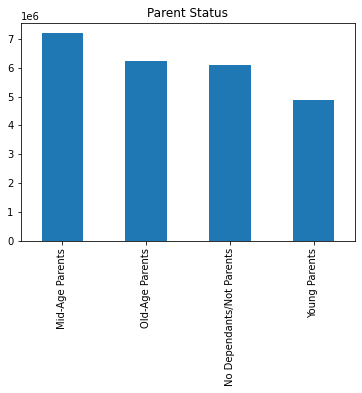

In [104]:
# Creating bar plot for parent status
df_final_data['Parent_Status'].value_counts().plot.bar(title = 'Parent Status')

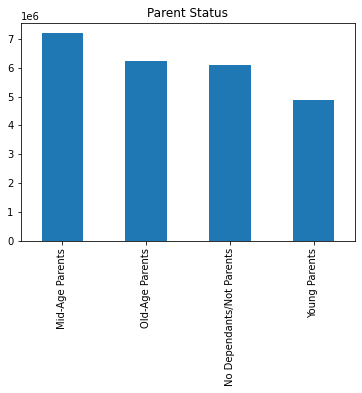

In [107]:
# Saving bar plot 
bar_Parent_Status = df_final_data['Parent_Status'].value_counts().plot.bar(title = 'Parent Status')

In [108]:
# Exporting bar plot in image format
bar_Parent_Status.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_parent_status.png'))

<AxesSubplot:title={'center':'Income Level'}>

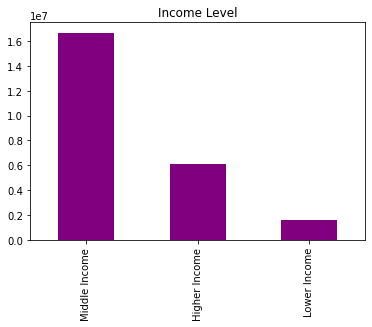

In [103]:
# Creating box plot for income profile
df_final_data['Income Level'].value_counts().plot.bar(color ='purple', title = 'Income Level')

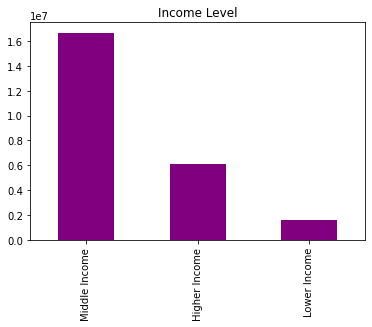

In [111]:
# Saving bar plot 
bar_Income_Level = df_final_data['Income Level'].value_counts().plot.bar(color ='purple', title = 'Income Level')

In [112]:
# Exporting bar plot in image format
bar_Income_Level.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_Income_Level.png'))

<AxesSubplot:title={'center':'Alcohol Drinker'}>

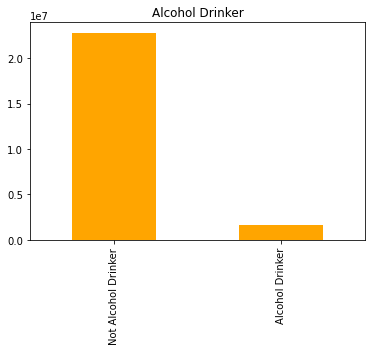

In [115]:
# Creating bar plot for alcohol drinkers profile
df_final_data['Alcohol Drinker'].value_counts().plot.bar(color ='orange', title = 'Alcohol Drinker')

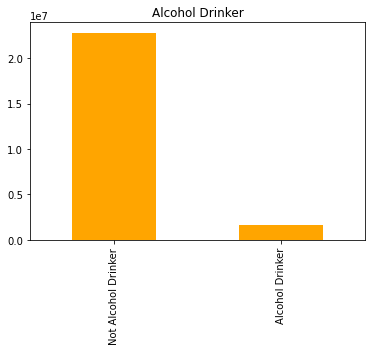

In [116]:
# Saving bar plot 
bar_Alcohol_Drinker = df_final_data['Alcohol Drinker'].value_counts().plot.bar(color ='orange', title = 'Alcohol Drinker')

In [117]:
# Exporting bar plot in image format
bar_Alcohol_Drinker.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_Alcohol_Drinker.png'))

<AxesSubplot:title={'center':'Breakfast Buyer'}>

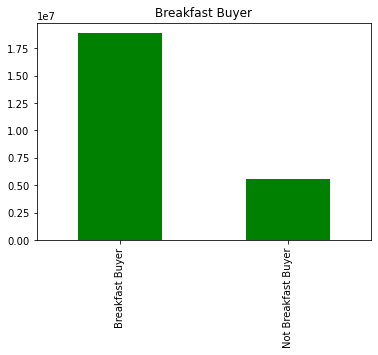

In [118]:
# Creating Visualization of breakfast buyers
df_final_data['Breakfast Buyer'].value_counts().plot.bar(color ='green', title = 'Breakfast Buyer')

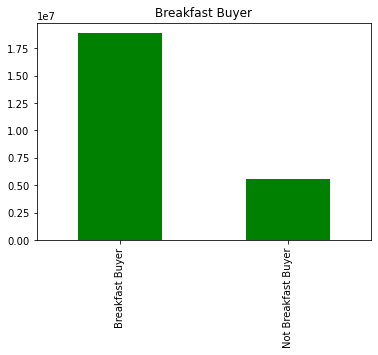

In [119]:
# Saving bar plot 
bar_Breakfast_Buyer = df_final_data['Breakfast Buyer'].value_counts().plot.bar(color ='green', title = 'Breakfast Buyer')

In [120]:
# Exporting bar plot in image format
bar_Breakfast_Buyer.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'bar_Breakfast_Buyer.png'))

# 11. Aggregate the max, mean, and min variables on a customer-profile level

In [121]:
#Do certain Parents categories shop at different hours of the day?

df_final_data.groupby('Parent_Status').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                        max min       mean median
Parent_Status                                                    
Mid-Age Parents                          23   0  13.374915     13
No Dependants/Not Parents                23   0  13.365228     13
Old-Age Parents                          23   0  13.362096     13
Young Parents                            23   0  13.341019     13

There is no strong co-relation found between the variables.

In [123]:
#Do certain Parents categories shop on different days of the week?

df_final_data.groupby('Parent_Status').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                         max min      mean median
Parent_Status                                                    
Mid-Age Parents                            6   0  2.751182      3
No Dependants/Not Parents                  6   0  2.741635      3
Old-Age Parents                            6   0  2.753424      3
Young Parents                              6   0  2.744084      3

No strong relation found between the variables

In [125]:
# Are there customers with particular age who buy more alcohol?
df_final_data.groupby('Alcohol Drinker').agg({'Age':['mean','median','min', 'max']})

Age               
                          mean median min max
Alcohol Drinker                              
Alcohol Drinker      49.278873     49  18  81
Not Alcohol Drinker  49.470146     49  18  81

No strong relation found between the variables

In [127]:
# Are there customers with particular income who buy more alcohol?
df_final_data.groupby('Alcohol Drinker').agg({'Annual_income':['mean','median','min', 'max']})

Annual_income                       
                              mean  median    min     max
Alcohol Drinker                                          
Alcohol Drinker      112048.049284  100246  26170  593901
Not Alcohol Drinker   99022.886635   96579  25903  591089

We can see that people with slightly high income tend to buy alcohol.

In [128]:
# People who buy breakfast, do they shop at any particular time of day?
df_final_data.groupby('Breakfast Buyer').agg({'order_hour_of_day':['mean','median','min', 'max']})

order_hour_of_day               
                                 mean median min max
Breakfast Buyer                                     
Breakfast Buyer             13.346211     13   0  23
Not Breakfast Buyer         13.417800     13   0  23

No strong co-relation found between the variables

In [130]:
# Do breakfast buyers tend to have higher incomes?
df_final_data.groupby('Breakfast Buyer').agg({'Annual_income':['mean','median','min', 'max']})

Annual_income                      
                              mean median    min     max
Breakfast Buyer                                         
Breakfast Buyer      100724.010493  97278  25937  593901
Not Breakfast Buyer   97067.892292  95323  25903  590790

Yes, breakfast buyers tend to have higher income.

In [131]:
# Do alcohol drinkers place orders more frequently

df_final_data.groupby('Alcohol Drinker').agg({'days_since_prior_order':['mean','median','min', 'max']})

days_since_prior_order               
                                      mean median min max
Alcohol Drinker                                          
Alcohol Drinker                   9.489670      7   0  30
Not Alcohol Drinker              10.127975      7   0  30

Yes, alcohol drinkers shop more frequently as compared to non alcohol drinkers.

# 12.Compare your customer profiles with regions and departments

In [132]:
# First we will create customers profiles with regions and departments
df_customer_profile = df_final_data[['user_id', 'Region', 'department_id', 'Parent_Status', 'Income Level', 'Alcohol Drinker', 'Breakfast Buyer']]

In [133]:
# Checking the size of new dataframe
df_customer_profile.shape

(24414877, 7)

In [134]:
# Checking the first 5 rows
df_customer_profile.head()

,user_id,Region,department_id,Parent_Status,Income Level,Alcohol Drinker,Breakfast Buyer
0,196224,Northeast,19,Mid-Age Parents,Middle Income,Not Alcohol Drinker,Not Breakfast Buyer
1,196224,Northeast,19,Mid-Age Parents,Middle Income,Not Alcohol Drinker,Not Breakfast Buyer
2,196224,Northeast,19,Mid-Age Parents,Middle Income,Not Alcohol Drinker,Not Breakfast Buyer
3,196224,Northeast,19,Mid-Age Parents,Middle Income,Not Alcohol Drinker,Not Breakfast Buyer
4,196224,Northeast,19,Mid-Age Parents,Middle Income,Not Alcohol Drinker,Not Breakfast Buyer


# Parent status profile with department and region

In [136]:
# Parent status by department
crosstab_parent_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Parent_Status'], dropna=False )

In [138]:
crosstab_parent_dept

Parent_Status,Mid-Age Parents,No Dependants/Not Parents,Old-Age Parents,Young Parents
department_id,,,,
1,479820,405513,417655,324626
2,7734,6935,6858,5639
3,259877,221599,225756,176098
4,2125440,1812885,1849447,1439319
5,30666,27959,26386,22961
6,58413,50038,49693,39756
7,598183,512055,524930,401279
8,20922,18250,18484,14455
9,187875,157414,161388,127048


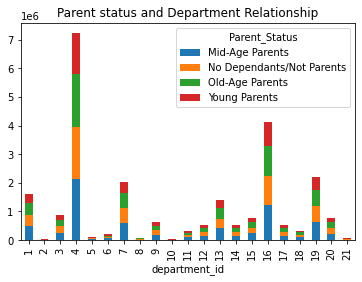

In [154]:
# Stacked bar plot for parent department
parent_dept_stacked_bar = crosstab_parent_dept.plot.bar(stacked= True, title = 'Parent status and Department Relationship')

In [155]:
# Exporting bar chart
parent_dept_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'Parent_department_stacked_bar.png'))

In [139]:
# Parent status by region
crosstab_parent_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Parent_Status'], dropna=False )

In [140]:
crosstab_parent_region

Parent_Status,Mid-Age Parents,No Dependants/Not Parents,Old-Age Parents,Young Parents
Region,,,,
Midwest,1700196,1436961,1438890,1135709
Northeast,1279495,1065138,1109306,861332
South,2370419,2038334,2081415,1638918
West,1840023,1564569,1611775,1242397


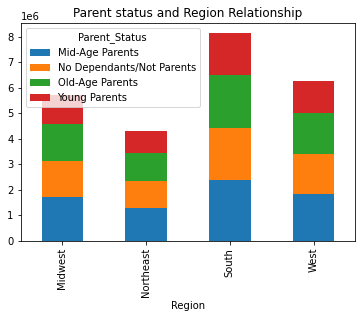

In [156]:
# Stacked bar plot for parent region
parent_region_stacked_bar = crosstab_parent_region.plot.bar(stacked= True, title = 'Parent status and Region Relationship')

In [157]:
# Exporting bar chart
parent_region_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'parent_region_stacked_bar.png'))

# Income profile with department and region

In [141]:
# Income status by department
crosstab_income_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Income Level'], dropna=False )

In [142]:
crosstab_income_dept

Income Level,Higher Income,Lower Income,Middle Income
department_id,,,
1,418152,99903,1109559
2,6925,1918,18323
3,230059,49309,603962
4,1826609,387955,5012527
5,31353,7619,69000
6,50635,9839,137426
7,491879,194261,1350307
8,19489,4397,48225
9,164762,28127,440836


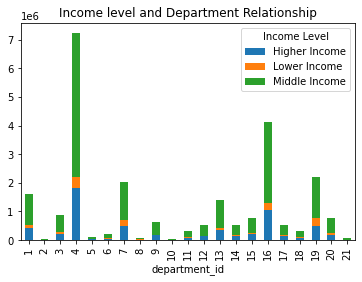

In [158]:
# Stacked bar plot for parent region
income_dept_stacked_bar = crosstab_income_dept.plot.bar(stacked= True, title = 'Income level and Department Relationship')

In [159]:
# Exporting bar chart
income_dept_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'income_dept_stacked_bar.png'))

In [143]:
# Income status by region
crosstab_income_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Income Level'], dropna=False )

In [144]:
crosstab_income_region

Income Level,Higher Income,Lower Income,Middle Income
Region,,,
Midwest,1456024,370703,3885029
Northeast,1083488,288083,2943700
South,2018129,554057,5556900
West,1566361,405571,4286832


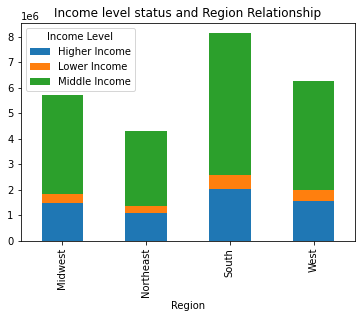

In [161]:
# Stacked bar plot for parent region
income_region_stacked_bar = crosstab_income_region.plot.bar(stacked= True, title = 'Income level status and Region Relationship')

In [162]:
# Exporting bar chart
income_region_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'income_region_stacked_bar.png'))

# Alcohol drinkers profile with department and region

In [145]:
# Alcohol drinkers status by department
crosstab_alcohol_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Alcohol Drinker'], dropna=False )

In [146]:
crosstab_alcohol_dept

Alcohol Drinker,Alcohol Drinker,Not Alcohol Drinker
department_id,,
1,109212,1518402
2,4618,22548
3,74727,808603
4,293108,6933983
5,107972,0
6,14550,183350
7,180859,1855588
8,12780,59331
9,43777,589948


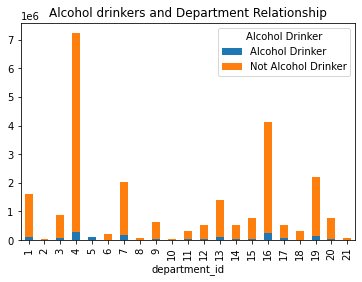

In [163]:
# Stacked bar plot for parent department
alcohol_dept_stacked_bar = crosstab_alcohol_dept.plot.bar(stacked= True, title = 'Alcohol drinkers and Department Relationship')

In [164]:
# Exporting bar chart
alcohol_dept_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'alcohol_dept_stacked_bar.png'))

In [147]:
# Alcohol drinker status by region
crosstab_alcohol_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Alcohol Drinker'], dropna=False )

In [148]:
crosstab_alcohol_region

Alcohol Drinker,Alcohol Drinker,Not Alcohol Drinker
Region,,
Midwest,377761,5333995
Northeast,273088,4042183
South,559573,7569513
West,424395,5834369


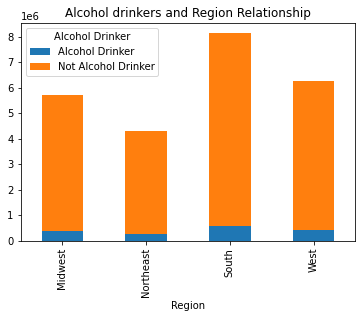

In [165]:
# Stacked bar plot for parent region
alcohol_region_stacked_bar = crosstab_alcohol_region.plot.bar(stacked= True, title = 'Alcohol drinkers and Region Relationship')

In [166]:
# Exporting bar chart
alcohol_region_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'alcohol_region_stacked_bar.png'))

# Breakfast buyers profile with department and region

In [150]:
# Breakfast buyers status by department
crosstab_breakfast_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Breakfast Buyer'], dropna=False )

In [151]:
crosstab_breakfast_dept

Breakfast Buyer,Breakfast Buyer,Not Breakfast Buyer
department_id,,
1,1265568,362046
2,20351,6815
3,716924,166406
4,5382347,1844744
5,62514,45458
6,151796,46104
7,1510261,526186
8,52505,19606
9,508713,125012


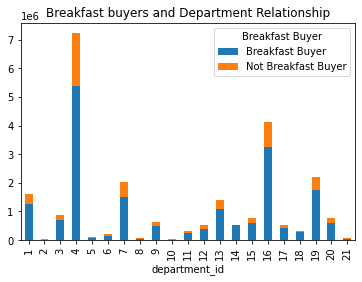

In [167]:
# Stacked bar plot for parent department
breakfast_dept_stacked_bar = crosstab_breakfast_dept.plot.bar(stacked= True, title = 'Breakfast buyers and Department Relationship')

In [168]:
# Exporting bar chart
breakfast_dept_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'breakfast_dept_stacked_bar.png'))

In [152]:
# Breakfast buyers status by region
crosstab_breakfast_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Breakfast Buyer'], dropna=False )

In [153]:
crosstab_breakfast_region

Breakfast Buyer,Breakfast Buyer,Not Breakfast Buyer
Region,,
Midwest,4391872,1319884
Northeast,3333598,981673
South,6281781,1847305
West,4871981,1386783


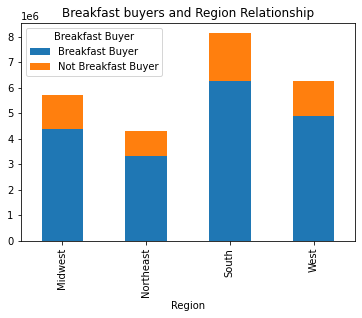

In [169]:
# Stacked bar plot for parent region
breakfast_region_stacked_bar = crosstab_breakfast_region.plot.bar(stacked= True, title = 'Breakfast buyers and Region Relationship')

In [170]:
# Exporting bar chart
breakfast_region_stacked_bar.figure.savefig(os.path.join(path, 'Analysis','Visualization', 'breakfast_region_stacked_bar.png'))

In [171]:
#Export df_final_data with all new changes

df_final_data.to_pickle(os.path.join(path,'Data','Prepared_data', 'Final_data_Task10.pkl'))